# Project Objective











# Perform EDA on the data and bulid a model which will predict whether the persom will suffer from Heart-attack or not

In [282]:
import pandas as pd 
import numpy as np 
import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")

In [283]:
df = pd.read_csv('US_Heart_Patients.csv')

In [284]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,heart_attack
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [285]:
df.shape

(4240, 16)

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  heart_attack     4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [287]:
for column in df.columns:
    print(column.upper(),':',df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

MALE : 2

0    2420
1    1820
Name: male, dtype: int64

AGE : 39

40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

EDUCATION : 4

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

CURRENTSMOKER : 2

0    2145
1    2095
Name: currentSmoker, dtype: int64

CIGSPERDAY : 33

0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0     

In [288]:
cat = ["male","education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]

In [289]:
for i in cat:
    df[i]=df[i].astype('object')

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  heart_attack     4240 non-null   int64  
dtypes: float64(7), int64(2), object(7)
memory usage: 530.1+ KB


In [291]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype == "object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'heart_attack']


In [292]:
round(df[num].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
age,4240.0,49.58,8.57,32.00,42.00,49.0,56.00,70.0
cigsPerDay,4211.0,9.01,11.92,0.00,0.00,0.0,20.00,70.0
totChol,4190.0,236.70,44.59,107.00,206.00,234.0,263.00,696.0
sysBP,4240.0,132.35,22.03,83.50,117.00,128.0,144.00,295.0
diaBP,4240.0,82.90,11.91,48.00,75.00,82.0,90.00,142.5
BMI,4221.0,25.80,4.08,15.54,23.07,25.4,28.04,56.8
heartRate,4239.0,75.88,12.03,44.00,68.00,75.0,83.00,143.0
glucose,3852.0,81.96,23.95,40.00,71.00,78.0,87.00,394.0
heart_attack,4240.0,0.15,0.36,0.00,0.00,0.0,0.00,1.0


In [293]:
round(df[cat].describe(),2).T

,count,unique,top,freq
male,4240.0,2.0,0.0,2420.0
education,4135.0,4.0,1.0,1720.0
currentSmoker,4240.0,2.0,0.0,2145.0
BPMeds,4187.0,2.0,0.0,4063.0
prevalentStroke,4240.0,2.0,0.0,4215.0
prevalentHyp,4240.0,2.0,0.0,2923.0
diabetes,4240.0,2.0,0.0,4131.0


# Unique values for categorical variables

In [294]:
for column in df.columns:
    print(column.upper(),':',df[column].nunique())
    print()
    print(df[column].value_counts())
    print()

MALE : 2

0    2420
1    1820
Name: male, dtype: int64

AGE : 39

40    192
46    182
42    180
41    174
48    173
39    170
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

EDUCATION : 4

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

CURRENTSMOKER : 2

0    2145
1    2095
Name: currentSmoker, dtype: int64

CIGSPERDAY : 33

0.0     2145
20.0     734
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0     

# Null Value Analysis and Treatment


In [295]:
round(df.isnull().sum()*100/df.shape[0],2).sort_values()

male               0.00
age                0.00
currentSmoker      0.00
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
sysBP              0.00
diaBP              0.00
heart_attack       0.00
heartRate          0.02
BMI                0.45
cigsPerDay         0.68
totChol            1.18
BPMeds             1.25
education          2.48
glucose            9.15
dtype: float64

In [296]:
df.isnull().sum().sort_values()

male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
heart_attack         0
heartRate            1
BMI                 19
cigsPerDay          29
totChol             50
BPMeds              53
education          105
glucose            388
dtype: int64

# handling Duplication

In [297]:
df.duplicated().sum()

0

# Null value Treatmet - Cat


In [298]:
for column in ['education' , 'BPMeds']:
    df[column].fillna(df[column].mode()[0],inplace=True)

In [299]:
df[cat].isnull().sum()

male               0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
dtype: int64

# Null value Treatmet - Num

In [300]:
df_mean = df.copy()

In [301]:
df_median = df.copy()

In [302]:
for i in num:
    df_mean[i].fillna(df_mean[i].mean(),inplace=True)

In [303]:
df_mean.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
heart_attack       0
dtype: int64

In [304]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  heart_attack     4240 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 530.1+ KB


In [305]:
for i in num:
    df_median[i].fillna(df_median[i].mean(),inplace=True)

In [306]:
df_median.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
heart_attack       0
dtype: int64

In [307]:
df_knn = df.copy()

In [308]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed,columns=df_knn.columns)

In [309]:
df_knn.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
heart_attack       0
dtype: int64

# outlier Treatment

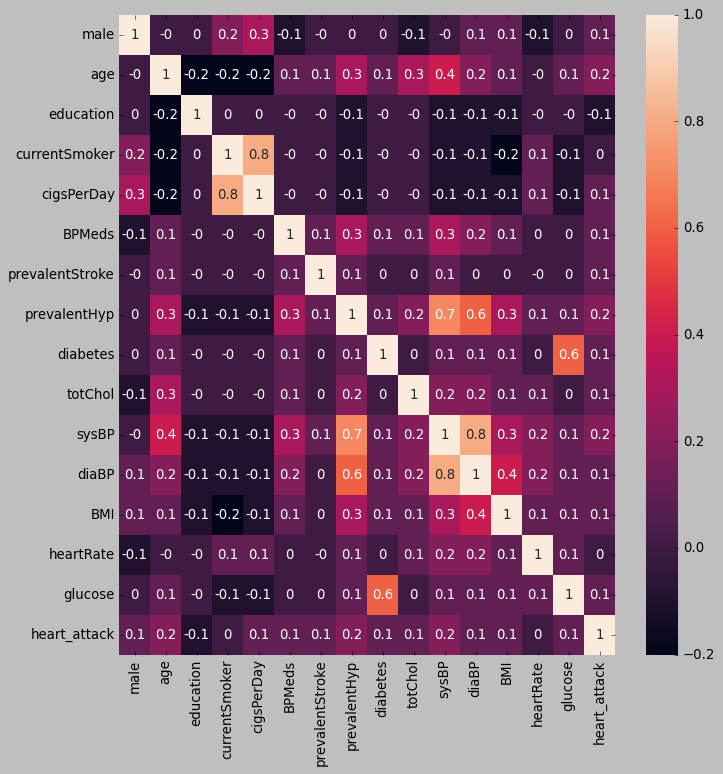

In [310]:
plt.figure(figsize=(10,10))
sns.heatmap(round(df_knn.corr(),1),annot=True)
plt.show()

# Mean Dataset

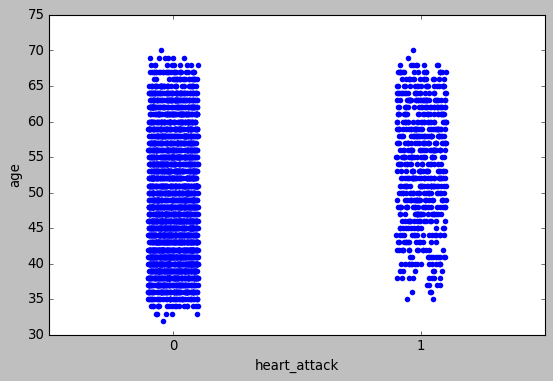

In [311]:
plt.figure(figsize=(8,5))
sns.stripplot(x=df["heart_attack"], y=df['age'], jitter=True)
plt.show()

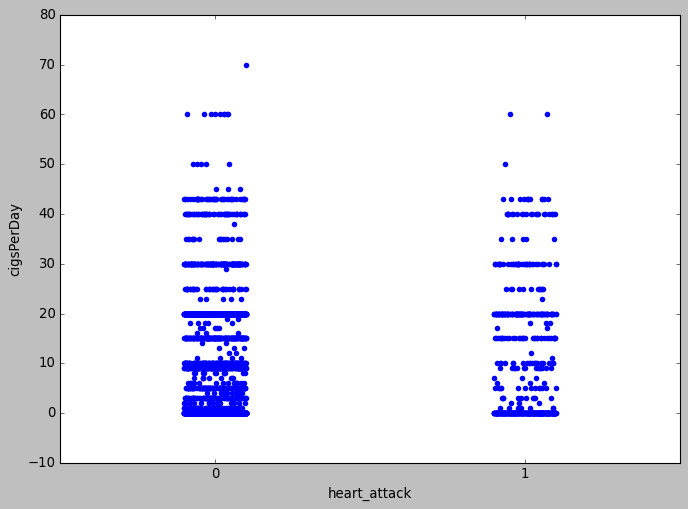

In [312]:
plt.figure(figsize=(10,7))
sns.stripplot(x=df_mean["heart_attack"], y=df_mean['cigsPerDay'],jitter=True)
plt.show()

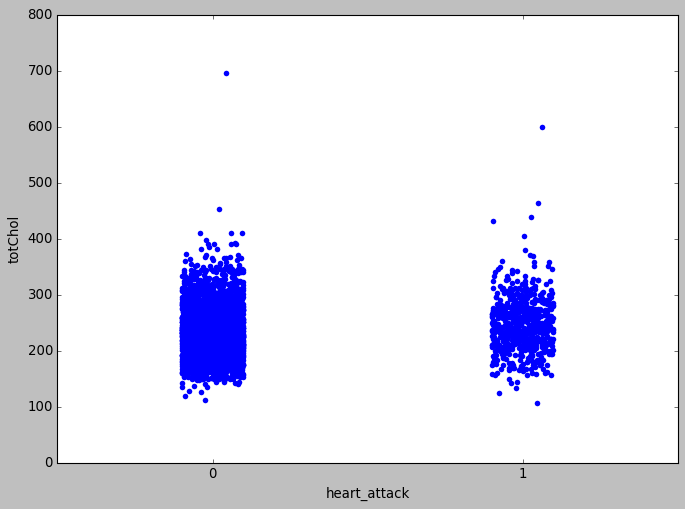

In [313]:
plt.figure(figsize=(10,7))
sns.stripplot(x=df_mean["heart_attack"], y=df_mean['totChol'],jitter=True)
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df_mean, hue = "heart_attack")
plt.show()

# Correlation plot

In [315]:
for i in ['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes']:
    df_mean[i]=df_mean[i].astype("float")

In [316]:
for i in ['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes']:
    df_median[i]=df_median[i].astype("float")

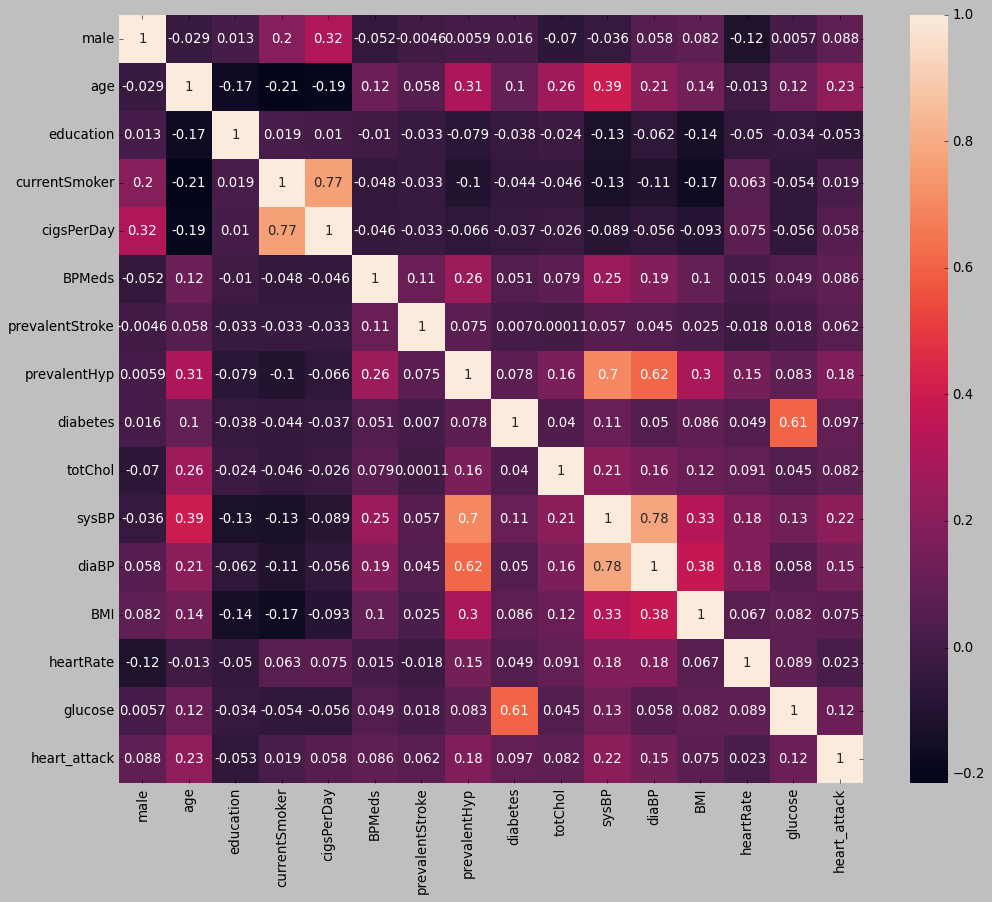

In [317]:
plt.figure(figsize=(15,12))
sns.heatmap(df_mean.corr(),annot=True)
plt.show()

In [318]:
df_mean.drop(["currentSmoker","diaBP"],axis=1,inplace=True)

# Outlier Treatment

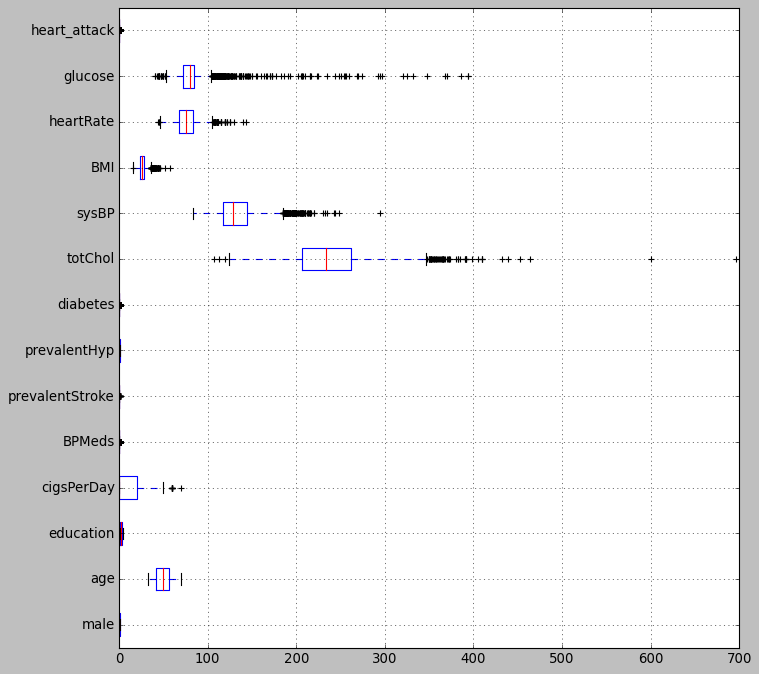

In [319]:
plt.figure(figsize=(10,10))
df_mean.boxplot(vert=0)
plt.show()

In [320]:
df_mean_o = df_mean.copy()

In [686]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range =Q1-(1.5*IQR)
    upper_range =Q3+(1.5*IQR)
    return lower_range,upper_range

In [322]:
remove_outlier(df_mean['glucose'])

(52.5, 104.5)

In [323]:
for column in df_mean_o.drop('glucose',axis=1).columns:
    
    lr,ur=remove_outlier(df_mean_o[column])
    
    df_mean_o[column] = np.where(df_mean_o[column]>ur,ur,df_mean_o[column])
    
    df_mean_o[column] = np.where(df_mean_o[column]<lr,lr,df_mean_o[column])
    


In [324]:
df_mean_o.drop('glucose',axis=1).columns

Index(['male', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'BMI', 'heartRate',
       'heart_attack'],
      dtype='object')

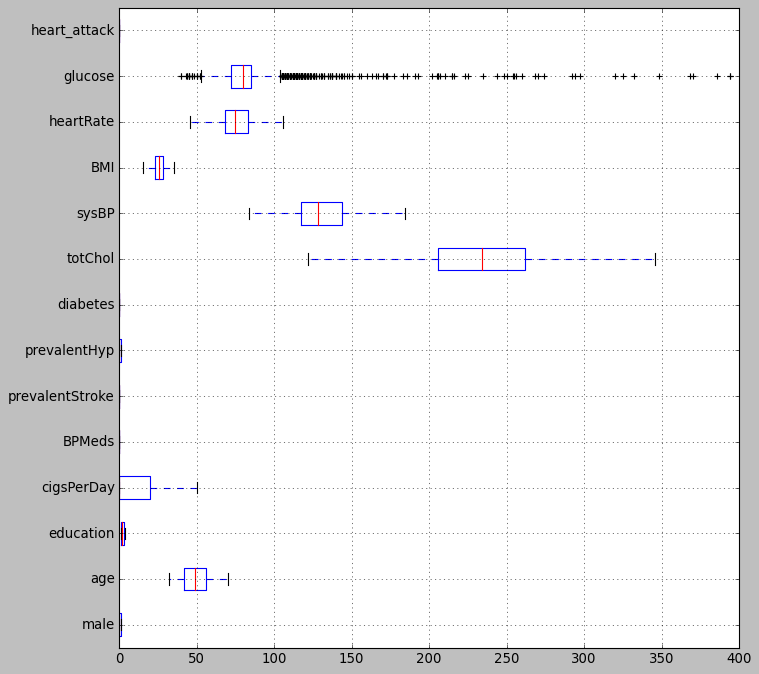

In [325]:
plt.figure(figsize=(10,10))
df_mean_o.boxplot(vert=0)
plt.show()


In [330]:
df_mean_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   float64
 6   prevalentHyp     4240 non-null   float64
 7   diabetes         4240 non-null   float64
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  BMI              4240 non-null   float64
 11  heartRate        4240 non-null   float64
 12  glucose          4240 non-null   float64
 13  heart_attack     4240 non-null   float64
dtypes: float64(14)
memory usage: 463.9 KB


# Scaling

# Min-Max

In [331]:
df_mean_o = df_mean_o.drop(['BPMeds','prevalentStroke','diabetes'],axis=1).apply(lambda x : (x-x.min()) / (x.max()-x.min()))

In [332]:
df_mean = df_mean.apply(lambda x : (x-x.min()) / (x.max()-x.min()))

In [333]:
df_mean_o

,male,age,education,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,heart_attack
0,1.0,0.184211,1.000000,0.00,0.0,0.325893,0.222772,0.571393,0.575000,0.104520,NaN
1,0.0,0.368421,0.333333,0.00,0.0,0.571429,0.371287,0.660192,0.825000,0.101695,NaN
2,1.0,0.421053,0.000000,0.40,0.0,0.549107,0.435644,0.489152,0.491667,0.084746,NaN
3,0.0,0.763158,0.666667,0.60,1.0,0.459821,0.658416,0.652624,0.325000,0.177966,NaN
4,0.0,0.368421,0.666667,0.46,0.0,0.727679,0.460396,0.376135,0.658333,0.127119,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,0.40,0.0,0.562500,0.470297,0.320636,0.641667,0.129944,NaN
4236,0.0,0.315789,0.000000,0.30,0.0,0.392857,0.425743,0.177346,0.675000,0.118541,NaN
4237,0.0,0.526316,0.333333,0.00,0.0,0.656250,0.495050,0.293895,0.575000,0.189266,NaN
4238,1.0,0.210526,0.666667,0.00,1.0,0.281250,0.569307,0.502270,0.358333,0.090395,NaN


# Model Building on Mean Data

In [334]:
X = df_mean.drop('heart_attack',axis=1)
y = df_mean['heart_attack']

In [335]:
#Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Naive Bayes

In [336]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [337]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [338]:
y_train_predict = NB_model.predict(X_train)

model_score = NB_model.score(X_train, y_train)

print(model_score)
print()
print(metrics.confusion_matrix(y_train,y_train_predict))
print()
print(metrics.classification_report(y_train,y_train_predict))

0.8264824797843666

[[2370  141]
 [ 374   83]]

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2511
         1.0       0.37      0.18      0.24       457

    accuracy                           0.83      2968
   macro avg       0.62      0.56      0.57      2968
weighted avg       0.79      0.83      0.80      2968



Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

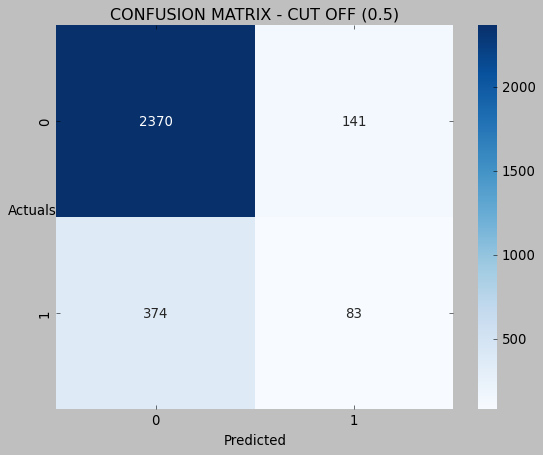

In [339]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')
               

In [340]:
print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      2744
         1.0       0.18      0.37      0.24       224

    accuracy                           0.83      2968
   macro avg       0.56      0.62      0.57      2968
weighted avg       0.89      0.83      0.85      2968



In [341]:
y_test_predict = NB_model.predict(X_test)

Text(0.5, 1.0, 'CONFUSION MATRIX - CUT OFF (0.5)')

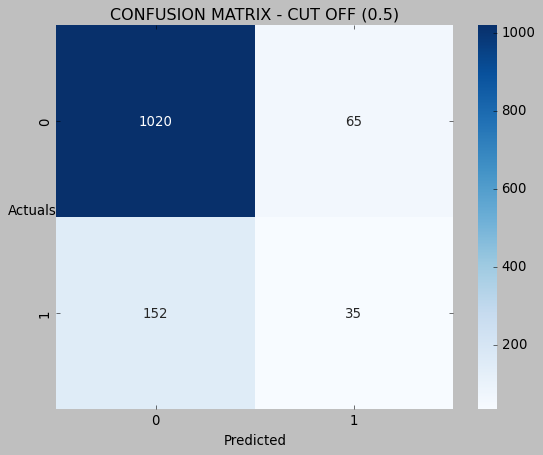

In [342]:
sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

In [343]:
print(metrics.classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1085
         1.0       0.35      0.19      0.24       187

    accuracy                           0.83      1272
   macro avg       0.61      0.56      0.57      1272
weighted avg       0.79      0.83      0.81      1272



# Decision Tree

In [344]:
from sklearn import tree

DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



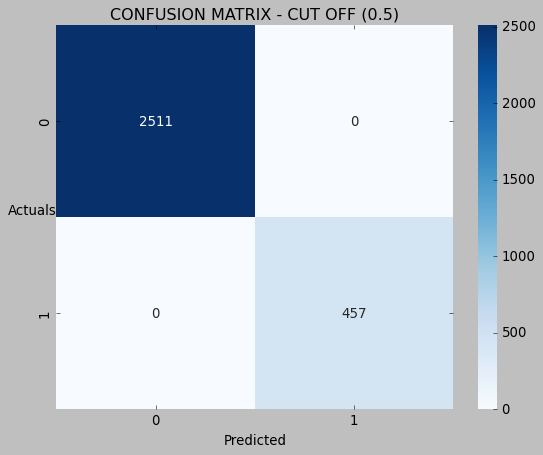

In [345]:
y_train_predict = DT_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1085
         1.0       0.26      0.27      0.27       187

    accuracy                           0.78      1272
   macro avg       0.57      0.57      0.57      1272
weighted avg       0.78      0.78      0.78      1272



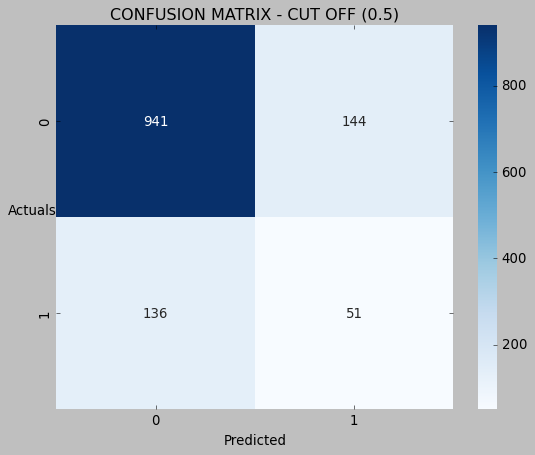

In [346]:
y_test_predict = DT_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test,y_test_predict))

# Random Forest

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



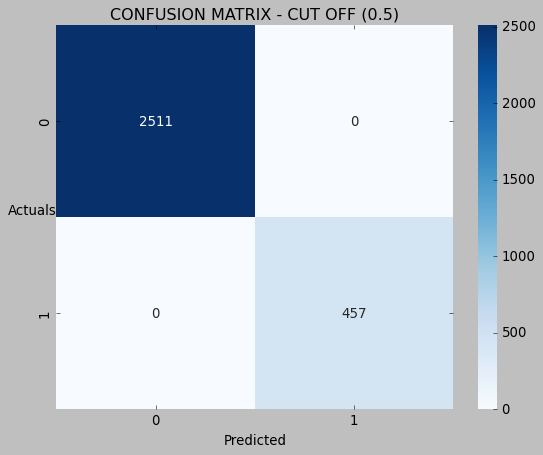

In [347]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train,y_train)

# Train Data Performance

y_train_predict = RF_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))






              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1251
         1.0       0.05      0.43      0.09        21

    accuracy                           0.85      1272
   macro avg       0.52      0.64      0.50      1272
weighted avg       0.97      0.85      0.90      1272



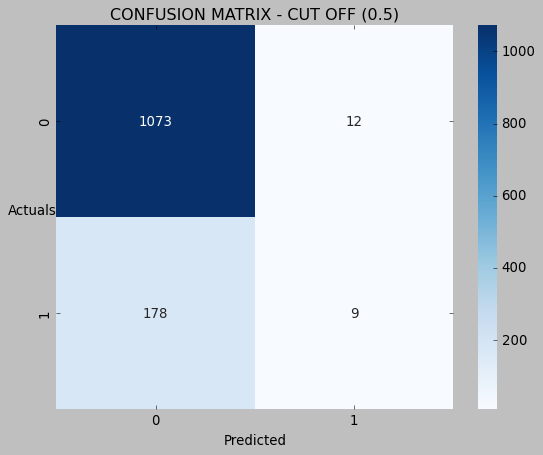

In [348]:
# Test Data Performance

y_test_predict = RF_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))


# Ada Boost

In [349]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2877
         1.0       0.14      0.71      0.24        91

    accuracy                           0.86      2968
   macro avg       0.57      0.79      0.58      2968
weighted avg       0.96      0.86      0.90      2968



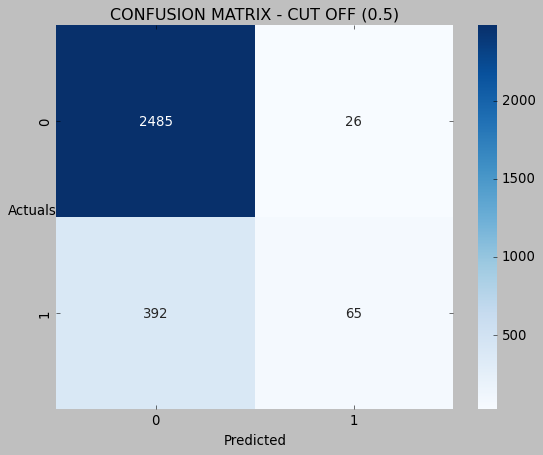

In [350]:
# Train Data Performance

y_train_predict = ADB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1239
         1.0       0.07      0.42      0.13        33

    accuracy                           0.85      1272
   macro avg       0.53      0.64      0.52      1272
weighted avg       0.96      0.85      0.90      1272



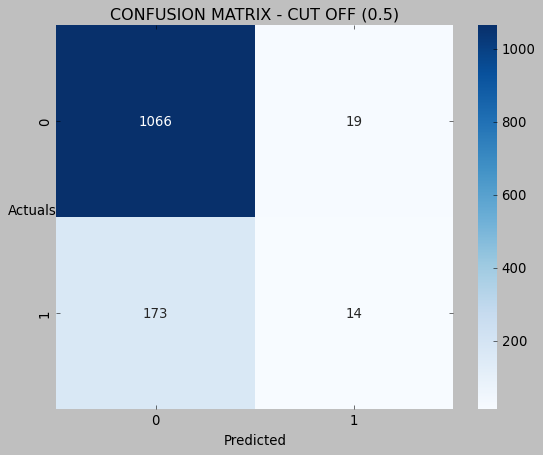

In [351]:
# Test Data Performance

y_test_predict = ADB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# Gradient Boosting

In [352]:
from sklearn.ensemble import GradientBoostingClassifier
GB_model = GradientBoostingClassifier(random_state=1)
GB_model = GB_model.fit(X_train,y_train)

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93      2854
         1.0       0.24      0.97      0.39       114

    accuracy                           0.88      2968
   macro avg       0.62      0.93      0.66      2968
weighted avg       0.97      0.88      0.91      2968



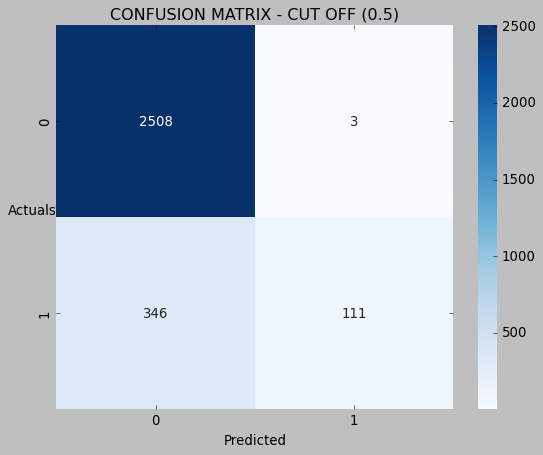

In [353]:
# Train Data Performance

y_train_predict = GB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1245
         1.0       0.07      0.48      0.12        27

    accuracy                           0.85      1272
   macro avg       0.53      0.67      0.52      1272
weighted avg       0.97      0.85      0.90      1272



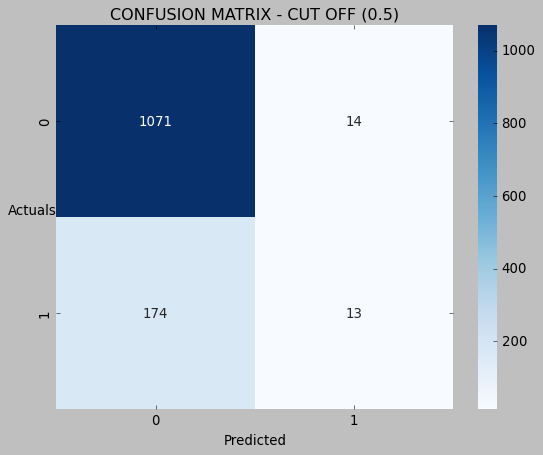

In [354]:
# Test Data Performance

y_test_predict = GB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# KNN

In [355]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2824
         1.0       0.24      0.76      0.36       144

    accuracy                           0.87      2968
   macro avg       0.61      0.82      0.65      2968
weighted avg       0.95      0.87      0.90      2968



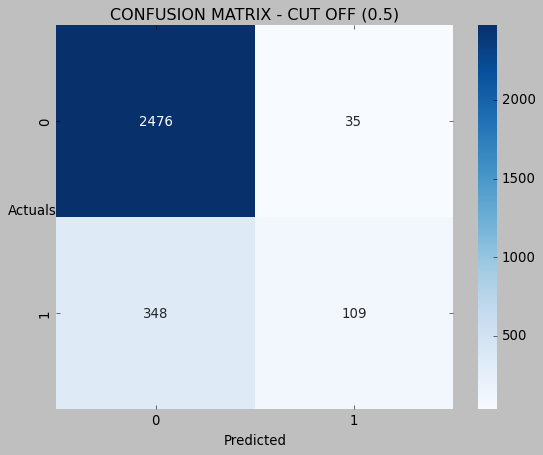

In [356]:
# Train Data Performance

y_train_predict = KNN_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.91      1225
         1.0       0.04      0.17      0.07        47

    accuracy                           0.83      1272
   macro avg       0.50      0.51      0.49      1272
weighted avg       0.93      0.83      0.87      1272



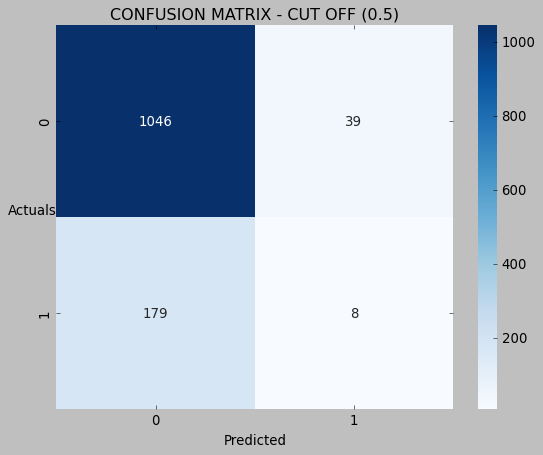

In [357]:
# Test Data Performance

y_test_predict = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# Grid Search

In [358]:
 from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [7,8,9,10],
    'max_features' : [11,12,13,14,15],
    'min_samples_leaf' : [20,25,30,35,40],
    'min_samples_split' : [68,65,70,75],
    'n_estimators' : [100,200,300,400]
}

grid_search = GridSearchCV(estimator = RF_model, param_grid = param_grid, cv = 3) 





In [ ]:
grid_search
grid_search.fit(X_train,y_train)

In [359]:
df_mean['heart_attack'].value_counts()*100/df_mean.shape[0]

0.0    84.811321
1.0    15.188679
Name: heart_attack, dtype: float64

# SMOTE

In [360]:
from imblearn.over_sampling import SMOTE

In [361]:
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

In [362]:
X_train.shape

(2968, 13)

In [363]:
X_train_s.shape

(5022, 13)

# SMOTE KNN

In [364]:
KNN_model_s = KNeighborsClassifier()
KNN_model_s.fit(X_train_s,y_train_s)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86      1971
         1.0       0.98      0.81      0.89      3051

    accuracy                           0.88      5022
   macro avg       0.88      0.89      0.87      5022
weighted avg       0.90      0.88      0.88      5022



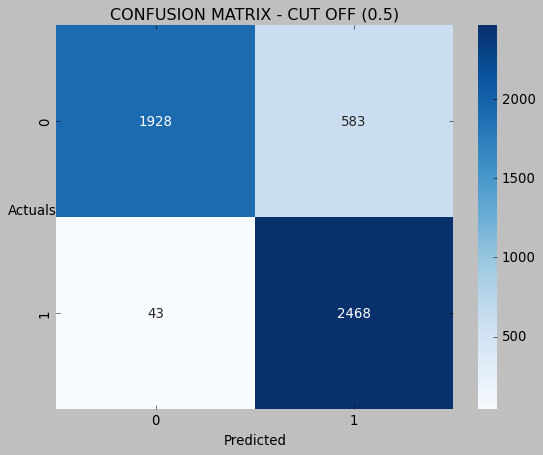

In [365]:
# Train Data Performance

y_train_predict = KNN_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.65      0.88      0.75       807
         1.0       0.48      0.19      0.27       465

    accuracy                           0.63      1272
   macro avg       0.56      0.53      0.51      1272
weighted avg       0.59      0.63      0.58      1272



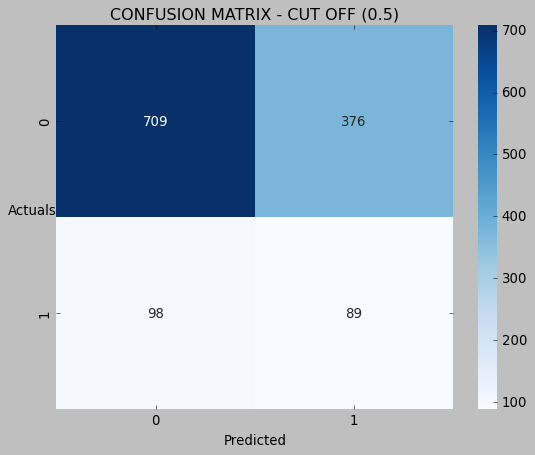

In [366]:
# Test Data Performance

y_test_predict = KNN_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# SMOTE GB

In [368]:
GB_model_s = GradientBoostingClassifier(random_state=1)
GB_model_s = GB_model.fit(X_train_s,y_train_s)

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      2507
         1.0       0.86      0.86      0.86      2515

    accuracy                           0.86      5022
   macro avg       0.86      0.86      0.86      5022
weighted avg       0.86      0.86      0.86      5022



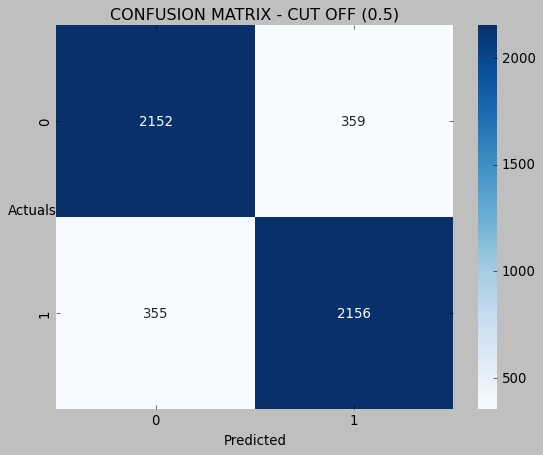

In [369]:
y_train_predict = GB_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      1006
         1.0       0.34      0.24      0.28       266

    accuracy                           0.74      1272
   macro avg       0.57      0.56      0.56      1272
weighted avg       0.71      0.74      0.73      1272



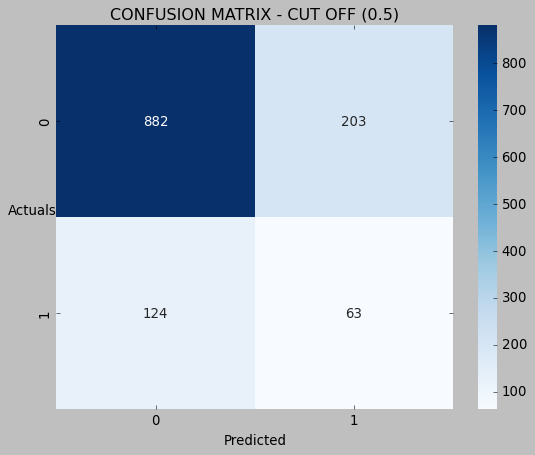

In [370]:
# Test Data Performance

y_test_predict = GB_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# SMOTE NB

In [372]:
NB_model_s = GaussianNB()
NB_model_s.fit(X_train_s, y_train_s)

GaussianNB()

              precision    recall  f1-score   support

         0.0       0.89      0.56      0.69      3989
         1.0       0.31      0.74      0.43      1033

    accuracy                           0.60      5022
   macro avg       0.60      0.65      0.56      5022
weighted avg       0.77      0.60      0.64      5022



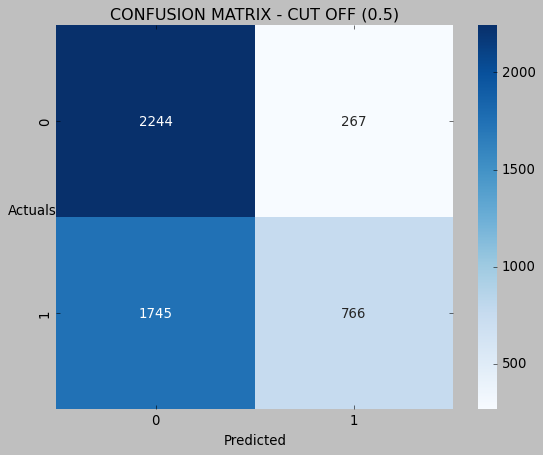

In [373]:
# Train Data Performance

y_train_predict = NB_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1092
         1.0       0.34      0.35      0.34       180

    accuracy                           0.81      1272
   macro avg       0.61      0.62      0.62      1272
weighted avg       0.81      0.81      0.81      1272



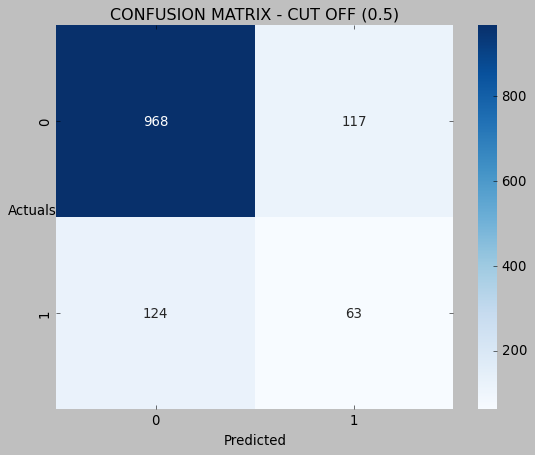

In [374]:
# Test Data Performance

y_test_predict = NB_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# SMOTE DT

In [375]:
DT_model_s = tree.DecisionTreeClassifier()
DT_model_s.fit(X_train_s,y_train_s)

DecisionTreeClassifier()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022



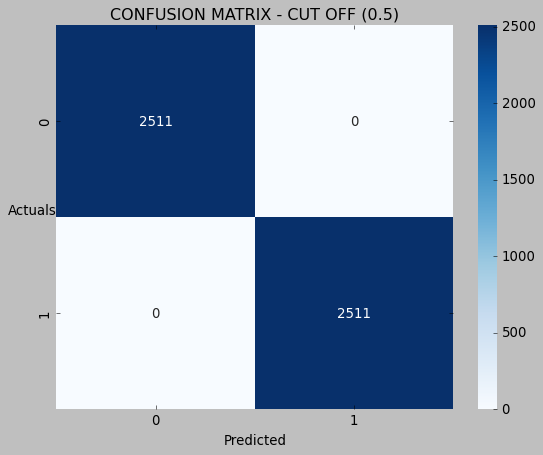

In [376]:
# Train Data Performance

y_train_predict = DT_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       982
         1.0       0.32      0.20      0.25       290

    accuracy                           0.72      1272
   macro avg       0.55      0.54      0.54      1272
weighted avg       0.68      0.72      0.69      1272



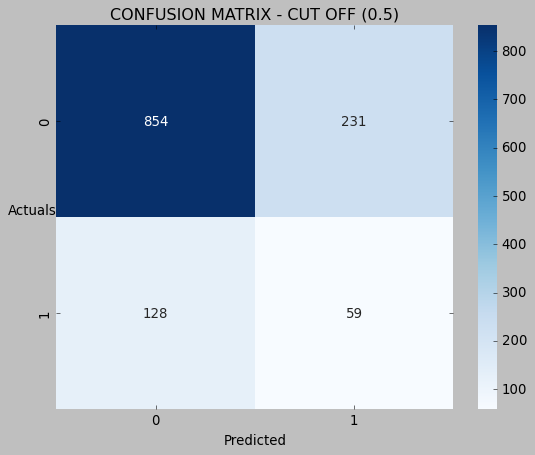

In [377]:
# Test Data Performance

y_test_predict = DT_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# SMOTE RF

In [378]:
RF_model_s = RandomForestClassifier(n_estimators=100,random_state=1)
RF_model_s.fit(X_train_s,y_train_s)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00      2511

    accuracy                           1.00      5022
   macro avg       1.00      1.00      1.00      5022
weighted avg       1.00      1.00      1.00      5022



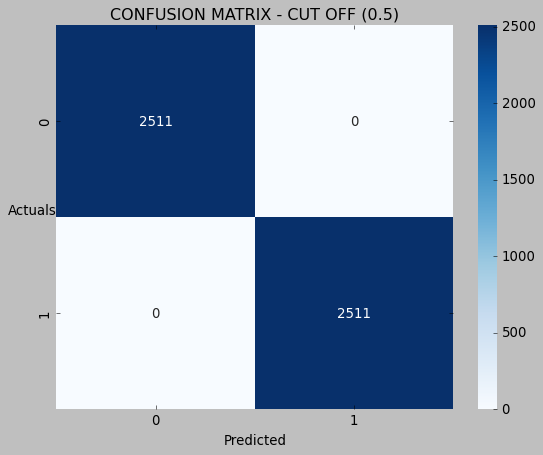

In [379]:
# Train Data Performance

y_train_predict = RF_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1104
         1.0       0.20      0.22      0.21       168

    accuracy                           0.78      1272
   macro avg       0.54      0.54      0.54      1272
weighted avg       0.79      0.78      0.78      1272



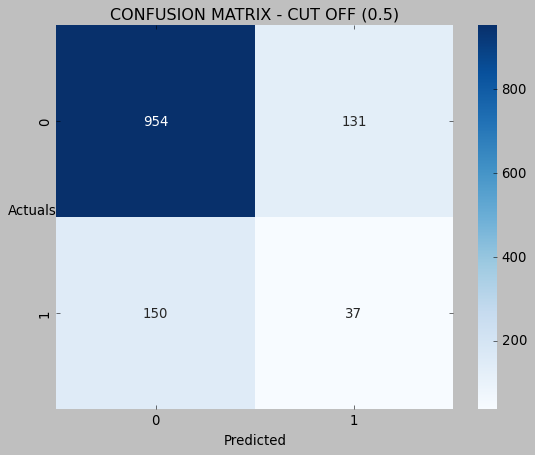

In [380]:
# Test Data Performance

y_test_predict = RF_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# SMOTE ADB

In [381]:
ADB_model_s = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model_s.fit(X_train_s,y_train_s)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      2512
         1.0       0.77      0.77      0.77      2510

    accuracy                           0.77      5022
   macro avg       0.77      0.77      0.77      5022
weighted avg       0.77      0.77      0.77      5022



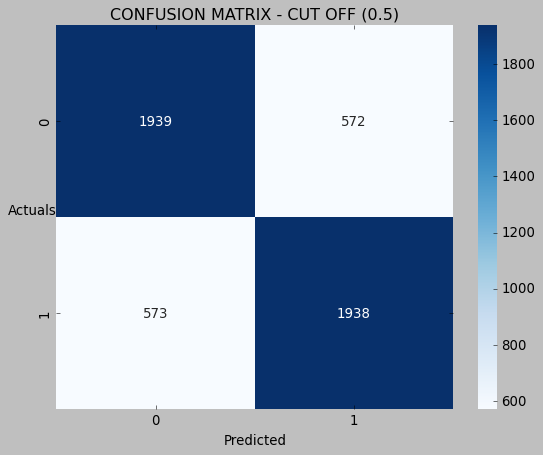

In [382]:
# Train Data Performance

y_train_predict = ADB_model_s.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.82       921
         1.0       0.45      0.24      0.31       351

    accuracy                           0.71      1272
   macro avg       0.60      0.56      0.56      1272
weighted avg       0.67      0.71      0.68      1272



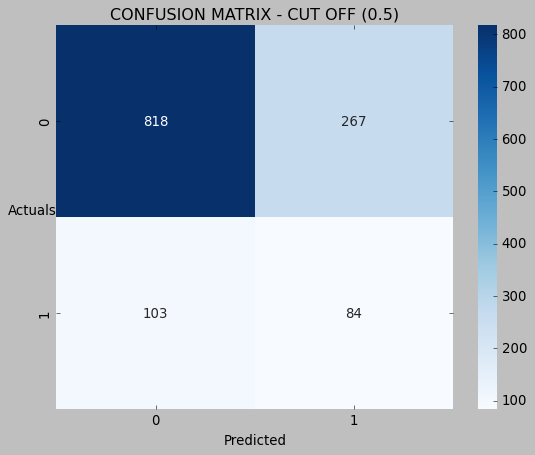

In [383]:
# Test Data Performance

y_test_predict = ADB_model_s.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# MEDIAN

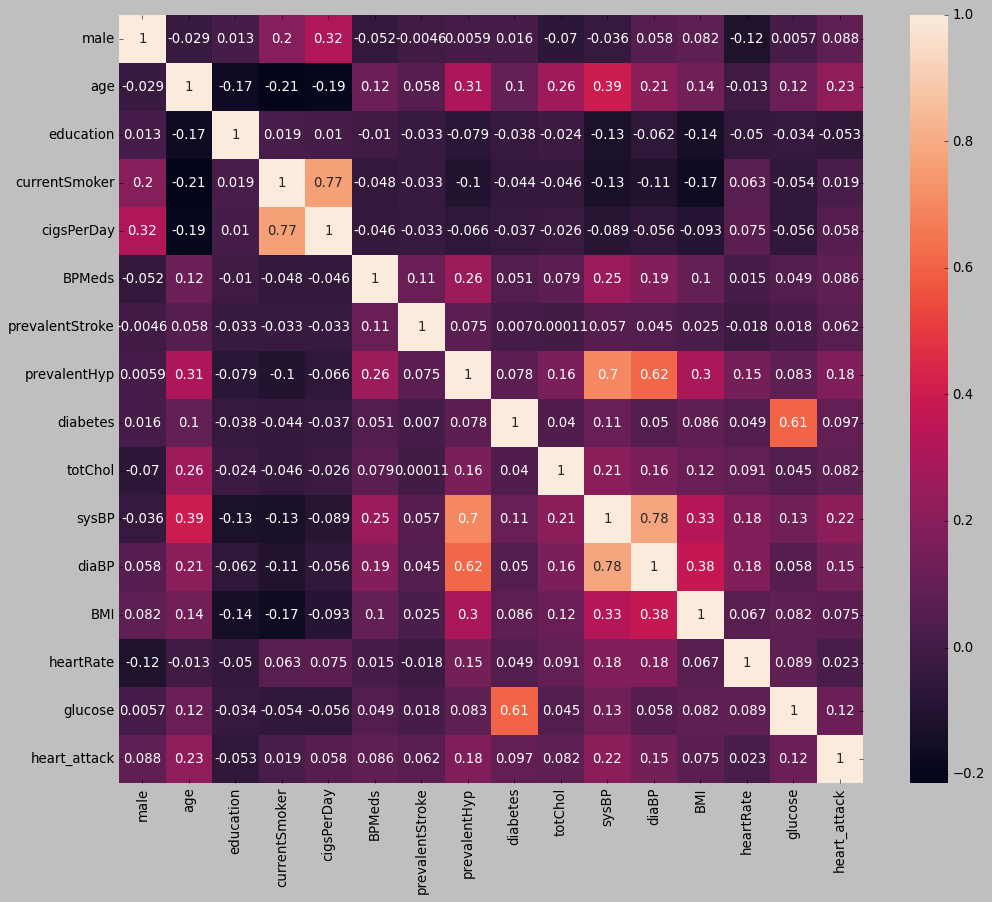

In [397]:
plt.figure(figsize=(15,12))
sns.heatmap(df_median.corr(),annot=True)
plt.show()

In [398]:
df_median.drop(["currentSmoker","diaBP"],axis=1,inplace=True)

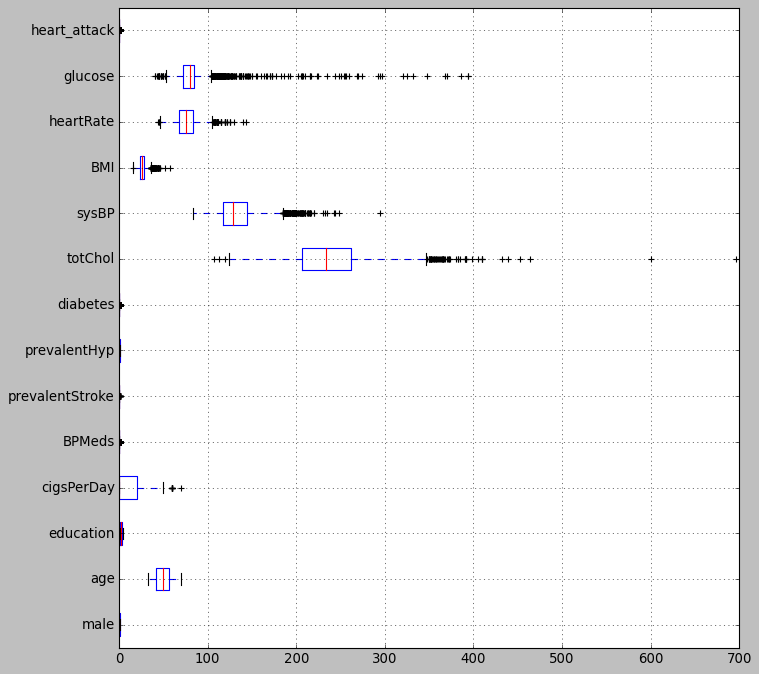

In [399]:
plt.figure(figsize=(10,10))
df_median.boxplot(vert=0)
plt.show()

In [400]:
df_median_o = df_median.copy()

In [401]:
for column in df_median_o.drop('glucose',axis=1).columns:
    
    lr,ur=remove_outlier(df_median_o[column])
    
    df_median_o[column] = np.where(df_median_o[column]>ur,ur,df_median_o[column])
    
    df_median_o[column] = np.where(df_median_o[column]<lr,lr,df_median_o[column])
    


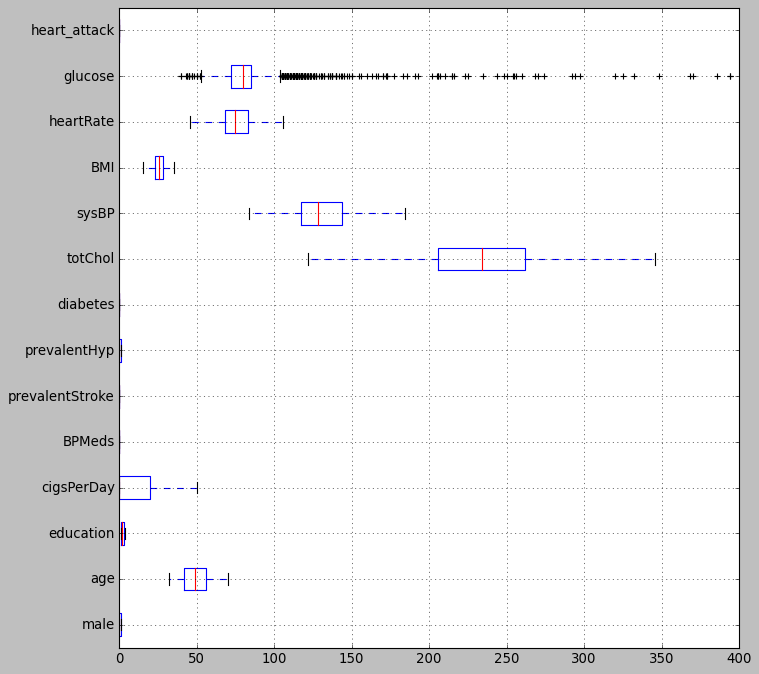

In [405]:
plt.figure(figsize=(10,10))
df_median_o.boxplot(vert=0)
plt.show()

In [407]:
df_median = df_median.apply(lambda x : (x-x.min()) / (x.max()-x.min()))

In [410]:
df_median_o =df_median_o.drop(['BPMeds','prevalentStroke','diabetes'],axis=1).apply(lambda x : (x-x.min()) / (x.max()-x.min()))

In [411]:
df_median_o

,male,age,education,cigsPerDay,prevalentHyp,totChol,sysBP,BMI,heartRate,glucose,heart_attack
0,1.0,0.184211,1.000000,0.00,0.0,0.325893,0.222772,0.571393,0.575000,0.104520,NaN
1,0.0,0.368421,0.333333,0.00,0.0,0.571429,0.371287,0.660192,0.825000,0.101695,NaN
2,1.0,0.421053,0.000000,0.40,0.0,0.549107,0.435644,0.489152,0.491667,0.084746,NaN
3,0.0,0.763158,0.666667,0.60,1.0,0.459821,0.658416,0.652624,0.325000,0.177966,NaN
4,0.0,0.368421,0.666667,0.46,0.0,0.727679,0.460396,0.376135,0.658333,0.127119,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4235,0.0,0.421053,0.333333,0.40,0.0,0.562500,0.470297,0.320636,0.641667,0.129944,NaN
4236,0.0,0.315789,0.000000,0.30,0.0,0.392857,0.425743,0.177346,0.675000,0.118541,NaN
4237,0.0,0.526316,0.333333,0.00,0.0,0.656250,0.495050,0.293895,0.575000,0.189266,NaN
4238,1.0,0.210526,0.666667,0.00,1.0,0.281250,0.569307,0.502270,0.358333,0.090395,NaN


# BULIDING MODEL ON MEDIAN DATA SET

In [414]:
X = df_median.drop('heart_attack',axis=1)
y = df_median['heart_attack']

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# NAVIE BAS

In [416]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      2744
         1.0       0.18      0.37      0.24       224

    accuracy                           0.83      2968
   macro avg       0.56      0.62      0.57      2968
weighted avg       0.89      0.83      0.85      2968



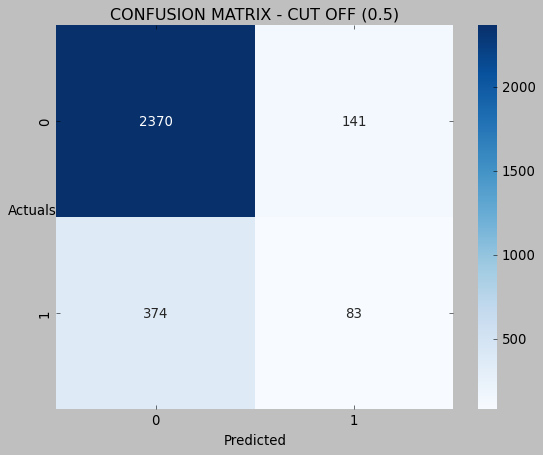

In [417]:
# Train Data Performance

y_train_predict = NB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      1172
         1.0       0.19      0.35      0.24       100

    accuracy                           0.83      1272
   macro avg       0.56      0.61      0.57      1272
weighted avg       0.88      0.83      0.85      1272



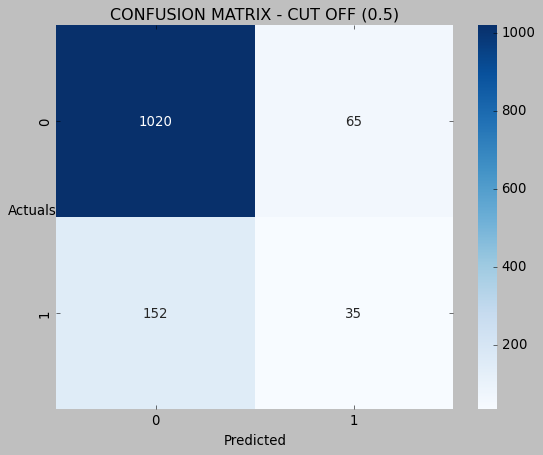

In [418]:
# Test Data Performance

y_test_predict = NB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# DECISION TREE

In [419]:
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



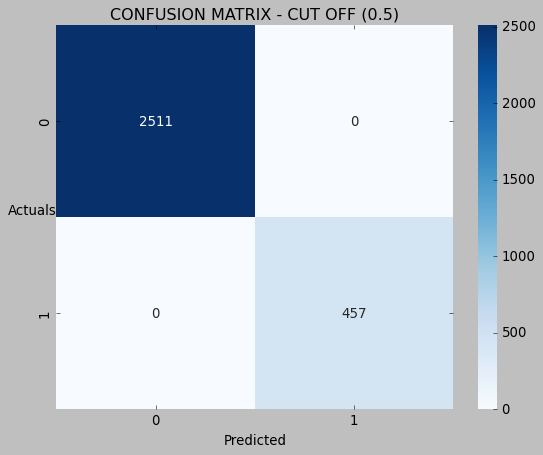

In [420]:
# Train Data Performance

y_train_predict = DT_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1076
         1.0       0.24      0.23      0.23       196

    accuracy                           0.77      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.77      0.77      0.77      1272



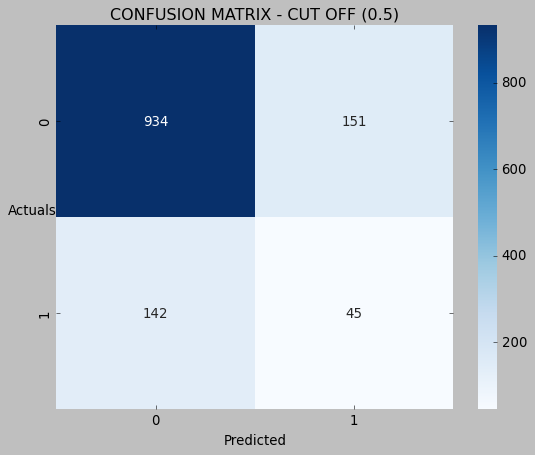

In [421]:
# Test Data Performance

y_test_predict = DT_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# RANDOM FOREST

In [422]:
RF_model = RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2511
         1.0       1.00      1.00      1.00       457

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968



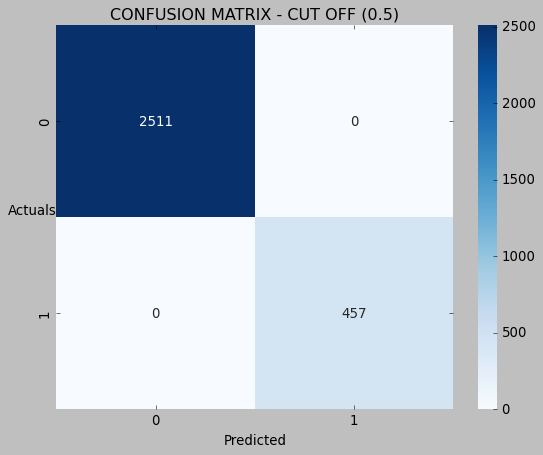

In [423]:
# Train Data Performance

y_train_predict = RF_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1251
         1.0       0.05      0.43      0.09        21

    accuracy                           0.85      1272
   macro avg       0.52      0.64      0.50      1272
weighted avg       0.97      0.85      0.90      1272



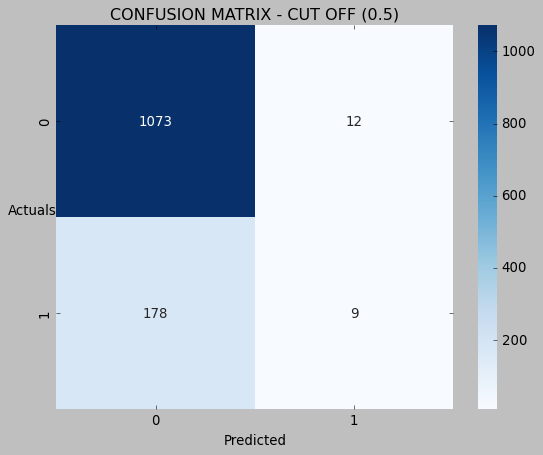

In [424]:
# Test Data Performance

y_test_predict = RF_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# ADB

In [425]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      2877
         1.0       0.14      0.71      0.24        91

    accuracy                           0.86      2968
   macro avg       0.57      0.79      0.58      2968
weighted avg       0.96      0.86      0.90      2968



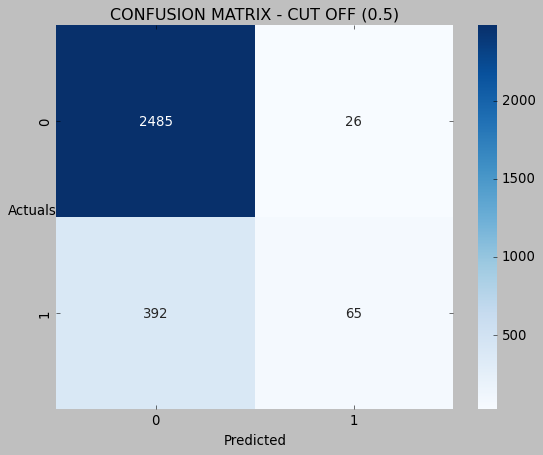

In [426]:
# Train Data Performance

y_train_predict = ADB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1239
         1.0       0.07      0.42      0.13        33

    accuracy                           0.85      1272
   macro avg       0.53      0.64      0.52      1272
weighted avg       0.96      0.85      0.90      1272



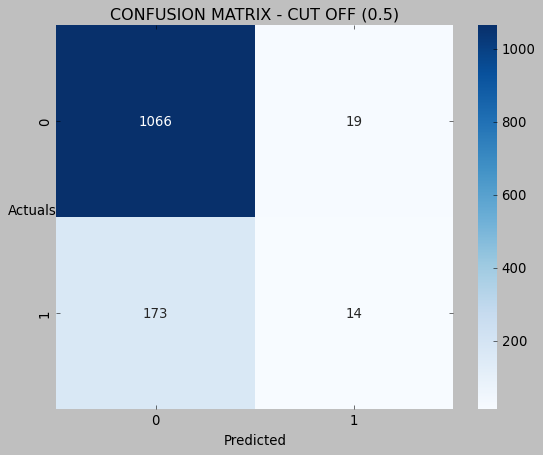

In [427]:
# Test Data Performance

y_test_predict = ADB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# GB

In [428]:
GB_model = GradientBoostingClassifier(random_state=1)
GB_model = GB_model.fit(X_train,y_train)

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93      2854
         1.0       0.24      0.97      0.39       114

    accuracy                           0.88      2968
   macro avg       0.62      0.93      0.66      2968
weighted avg       0.97      0.88      0.91      2968



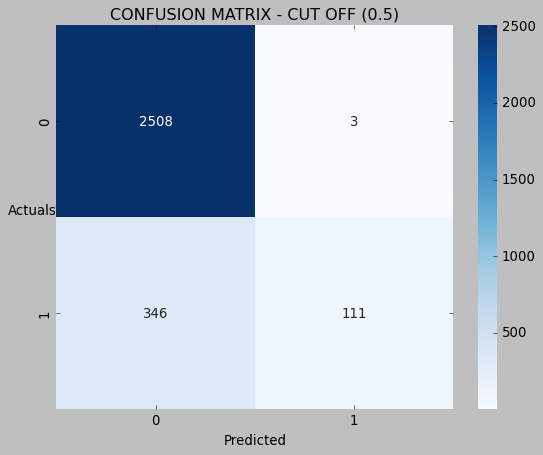

In [429]:
# Train Data Performance

y_train_predict = GB_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1245
         1.0       0.07      0.48      0.12        27

    accuracy                           0.85      1272
   macro avg       0.53      0.67      0.52      1272
weighted avg       0.97      0.85      0.90      1272



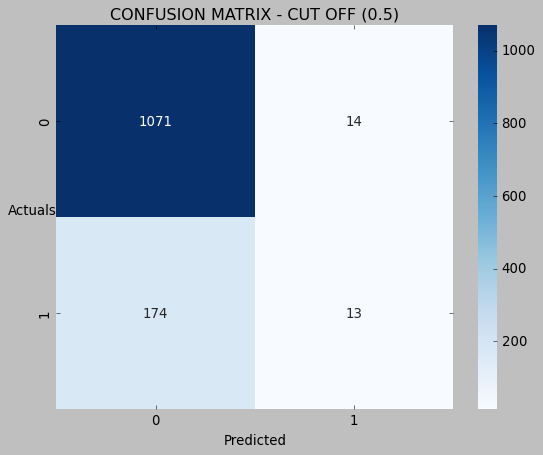

In [431]:
# Test Data Performance

y_test_predict = GB_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# KNN

In [432]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2824
         1.0       0.24      0.76      0.36       144

    accuracy                           0.87      2968
   macro avg       0.61      0.82      0.65      2968
weighted avg       0.95      0.87      0.90      2968



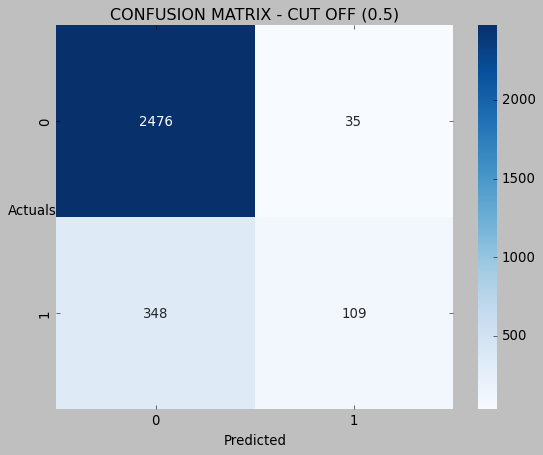

In [433]:
# Train Data Performance

y_train_predict = KNN_model.predict(X_train)

sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.91      1225
         1.0       0.04      0.17      0.07        47

    accuracy                           0.83      1272
   macro avg       0.50      0.51      0.49      1272
weighted avg       0.93      0.83      0.87      1272



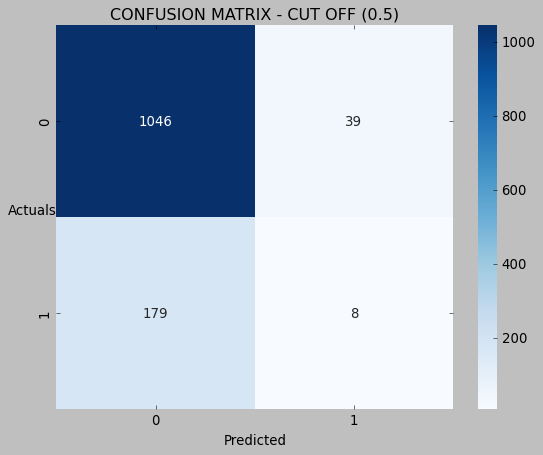

In [434]:
# Test Data Performance

y_test_predict = KNN_model.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# SMOTE

In [435]:
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

# NB

In [440]:
NB_model_sm = GaussianNB()
NB_model_sm.fit(X_train_s, y_train_s)

GaussianNB()

              precision    recall  f1-score   support

         0.0       0.89      0.56      0.69      3989
         1.0       0.31      0.74      0.43      1033

    accuracy                           0.60      5022
   macro avg       0.60      0.65      0.56      5022
weighted avg       0.77      0.60      0.64      5022



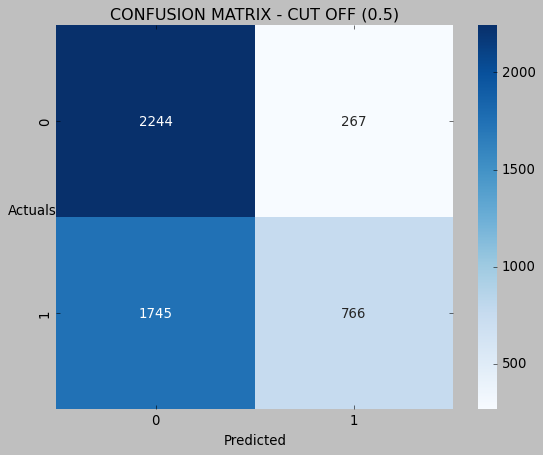

In [443]:
y_train_predict = NB_model_sm.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1092
         1.0       0.34      0.35      0.34       180

    accuracy                           0.81      1272
   macro avg       0.61      0.62      0.62      1272
weighted avg       0.81      0.81      0.81      1272



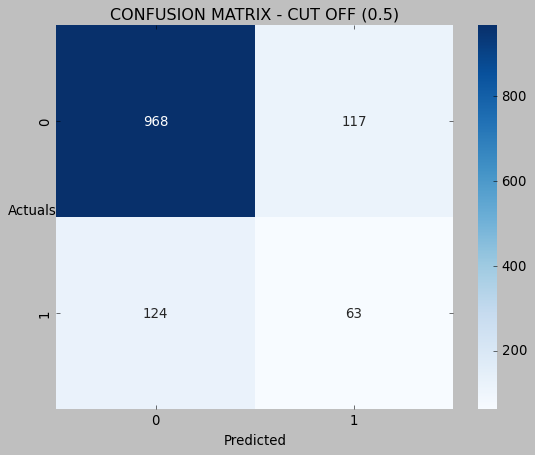

In [444]:
# Test Data Performance

y_test_predict = NB_model_sm.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# DT

In [442]:
DT_model_sm = tree.DecisionTreeClassifier()
DT_model_sm.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

         0.0       1.00      0.72      0.84      3473
         1.0       0.62      1.00      0.76      1549

    accuracy                           0.81      5022
   macro avg       0.81      0.86      0.80      5022
weighted avg       0.88      0.81      0.82      5022



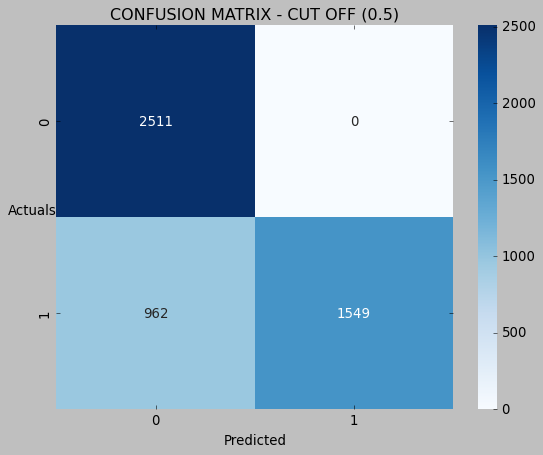

In [445]:
y_train_predict = DT_model_sm.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1063
         1.0       0.25      0.22      0.24       209

    accuracy                           0.76      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.75      0.76      0.76      1272



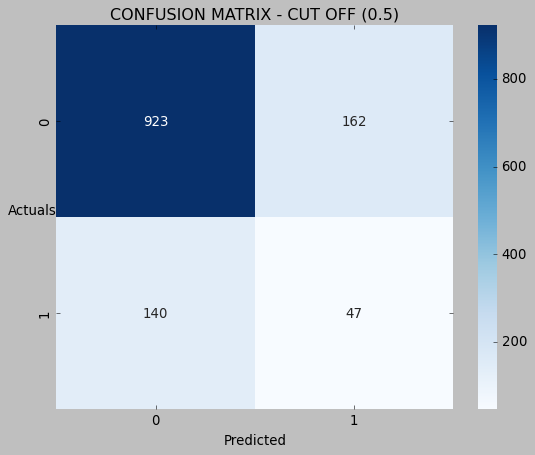

In [446]:
# Test Data Performance

y_test_predict = DT_model_sm.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# RF

In [448]:
RF_model_ms = RandomForestClassifier(n_estimators=100,random_state=1)
RF_model_ms.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.80      3798
         1.0       0.49      1.00      0.66      1224

    accuracy                           0.74      5022
   macro avg       0.74      0.83      0.73      5022
weighted avg       0.88      0.74      0.76      5022



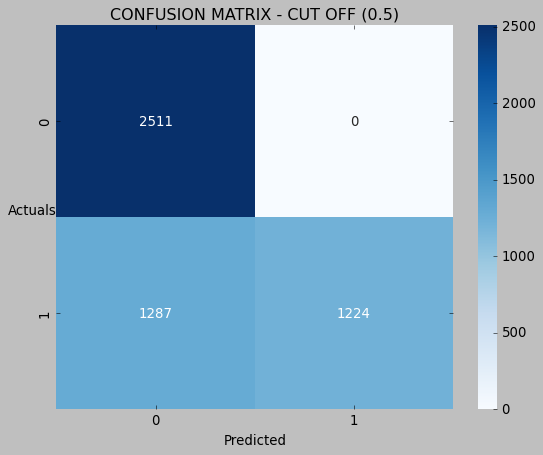

In [449]:
y_train_predict = RF_model_ms.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1251
         1.0       0.05      0.43      0.09        21

    accuracy                           0.85      1272
   macro avg       0.52      0.64      0.50      1272
weighted avg       0.97      0.85      0.90      1272



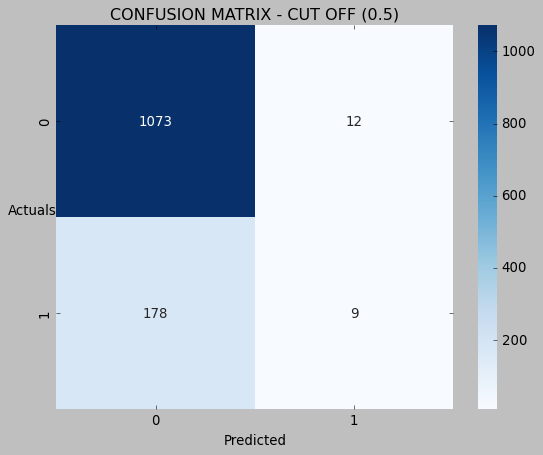

In [450]:
# Test Data Performance

y_test_predict = RF_model_ms.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# ADB

In [452]:
ADB_model_ms = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model_ms.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

              precision    recall  f1-score   support

         0.0       0.99      0.53      0.69      4729
         1.0       0.11      0.91      0.19       293

    accuracy                           0.55      5022
   macro avg       0.55      0.72      0.44      5022
weighted avg       0.94      0.55      0.66      5022



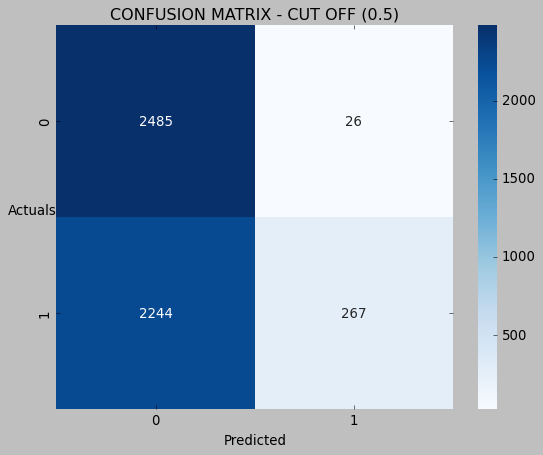

In [453]:
y_train_predict = ADB_model_ms.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      1239
         1.0       0.07      0.42      0.13        33

    accuracy                           0.85      1272
   macro avg       0.53      0.64      0.52      1272
weighted avg       0.96      0.85      0.90      1272



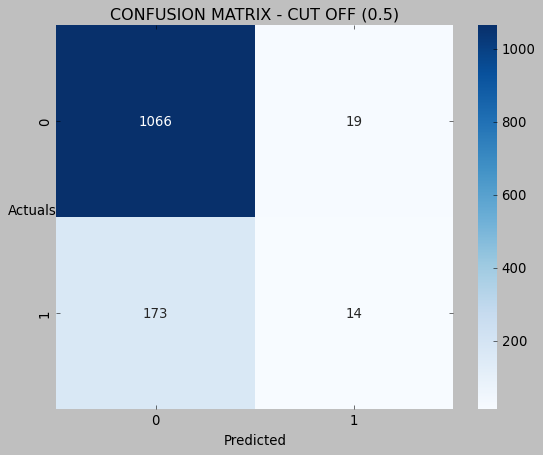

In [454]:
# Test Data Performance

y_test_predict = ADB_model_ms.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# GB

In [455]:
GB_model_ms = GradientBoostingClassifier(random_state=1)
GB_model_ms.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70      4618
         1.0       0.16      0.99      0.28       404

    accuracy                           0.58      5022
   macro avg       0.58      0.77      0.49      5022
weighted avg       0.93      0.58      0.67      5022



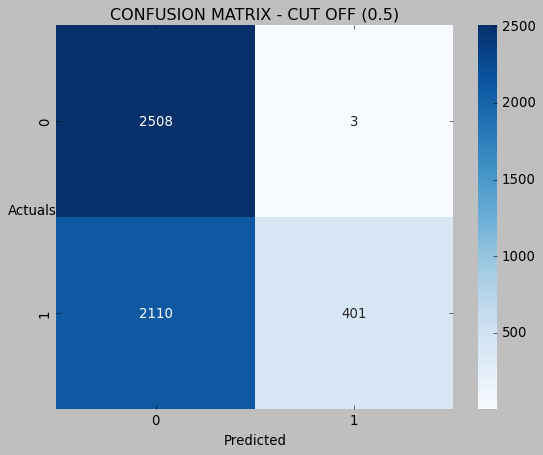

In [456]:
y_train_predict = GB_model_ms.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1245
         1.0       0.07      0.48      0.12        27

    accuracy                           0.85      1272
   macro avg       0.53      0.67      0.52      1272
weighted avg       0.97      0.85      0.90      1272



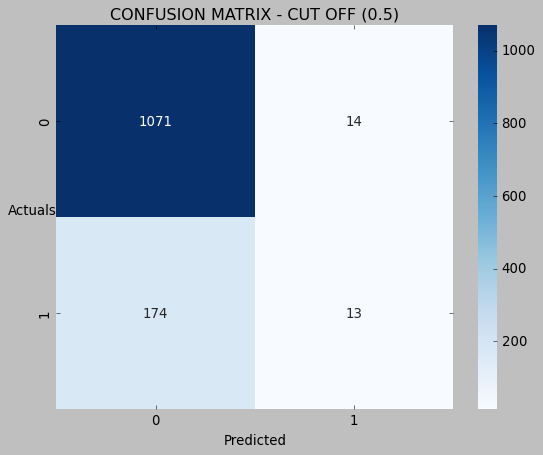

In [457]:
# Test Data Performance

y_test_predict = GB_model_ms.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

# KNN

In [458]:
KNN_model_ms = KNeighborsClassifier()
KNN_model_ms.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

         0.0       0.99      0.59      0.74      4222
         1.0       0.30      0.96      0.46       800

    accuracy                           0.65      5022
   macro avg       0.65      0.77      0.60      5022
weighted avg       0.88      0.65      0.69      5022



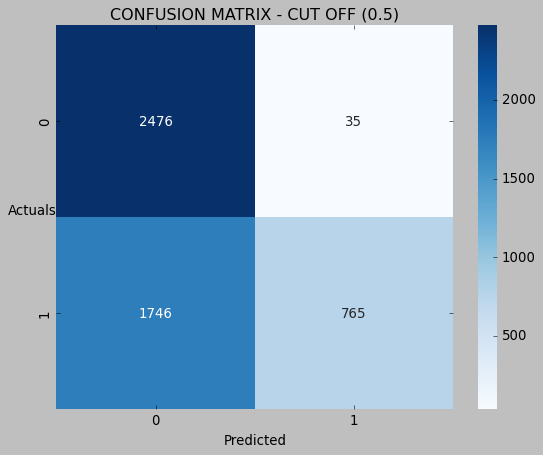

In [459]:
y_train_predict = KNN_model_ms.predict(X_train_s)

sns.heatmap((metrics.confusion_matrix(y_train_s,y_train_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_train_predict,y_train_s))

              precision    recall  f1-score   support

         0.0       0.96      0.85      0.91      1225
         1.0       0.04      0.17      0.07        47

    accuracy                           0.83      1272
   macro avg       0.50      0.51      0.49      1272
weighted avg       0.93      0.83      0.87      1272



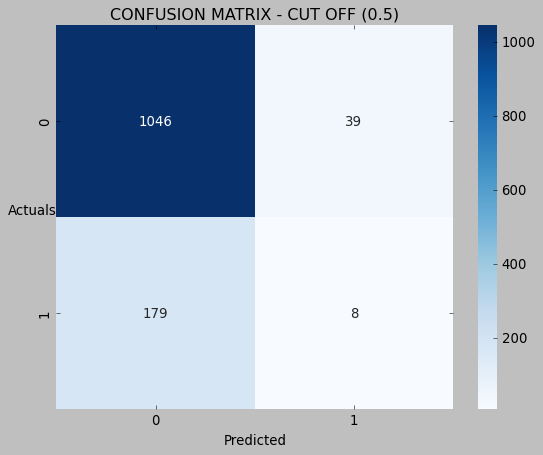

In [460]:
# Test Data Performance

y_test_predict = KNN_model_ms.predict(X_test)

sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals', rotation=0);
plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

print(metrics.classification_report(y_test_predict,y_test))

In [461]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [462]:
DT_model = tree.DecisionTreeClassifier()
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [463]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [464]:
RF_model = RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [465]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [466]:
GB_model = GradientBoostingClassifier(random_state=1)
GB_model = GB_model.fit(X_train,y_train)

In [467]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [468]:
def get_metrics_score(model,flag=True):
    '''
    
    model : Classifier to predict values in X
    
    '''
    
    score_list=[]
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc =model.score(X_train,y_train)
    test_acc =model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
    
    if flag == True:
        
        print("Accuracy on training set : ", model.score(X_train,y_train))
        print("Accuracy on test set : ", model.score(X_test,y_test))
        print("Recall on Training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    
    
    return score_list
    
    

In [471]:
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model,KNN_model_s,RF_model_s]

# defining empty list to add train and test data results

acc_train=[]
acc_test=[]
recall_train=[]
recall_test=[]
precision_train=[]
precision_test=[]

# looping through all the models to get tge acuracy, recall and precision scores

for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    

In [474]:
comparison_frame = pd.DataFrame({'Model' : ['DT_model', 'ADB_model', 'GB_model', 'KNN_model', 'NB_model', 'RF_model','KNN_model_s', 'RF_model_s'],
                                'Train_accuracy ' : acc_train,'Test_accuracy': acc_test,
                                'Train_Recall' : recall_train,'Test_Recall' :recall_test,
                                'Train_Precision' : precision_train,'Test_Precision':precision_test})
comparison_frame

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model,1.00,0.78,1.00,0.25,1.00,0.24
1,ADB_model,0.86,0.85,0.14,0.07,0.71,0.42
2,GB_model,0.88,0.85,0.24,0.07,0.97,0.48
3,KNN_model,0.87,0.83,0.24,0.04,0.76,0.17
4,NB_model,0.83,0.83,0.18,0.19,0.37,0.35
5,RF_model,1.00,0.85,1.00,0.05,1.00,0.43
6,KNN_model_s,0.80,0.63,0.96,0.48,0.43,0.19
7,RF_model_s,1.00,0.78,1.00,0.20,1.00,0.22


# Model Bulding on KNN Data Set

In [739]:
df_knn = df.copy()

In [702]:
df_knn_o = df_knn.copy()

In [534]:
df_knn_o.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
heart_attack       0
dtype: int64

In [740]:
for i in ['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes']:
    df_knn[i]=df_knn[i].astype("float")

In [523]:
for i in ['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes']:
    df_knn_o[i]=df_knn_o[i].astype("float")

In [741]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn)
df_knn = pd.DataFrame(data = df_imputed,columns=df_knn.columns)

In [533]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_knn_o)
df_knn_o = pd.DataFrame(data = df_imputed,columns=df_knn_o.columns)

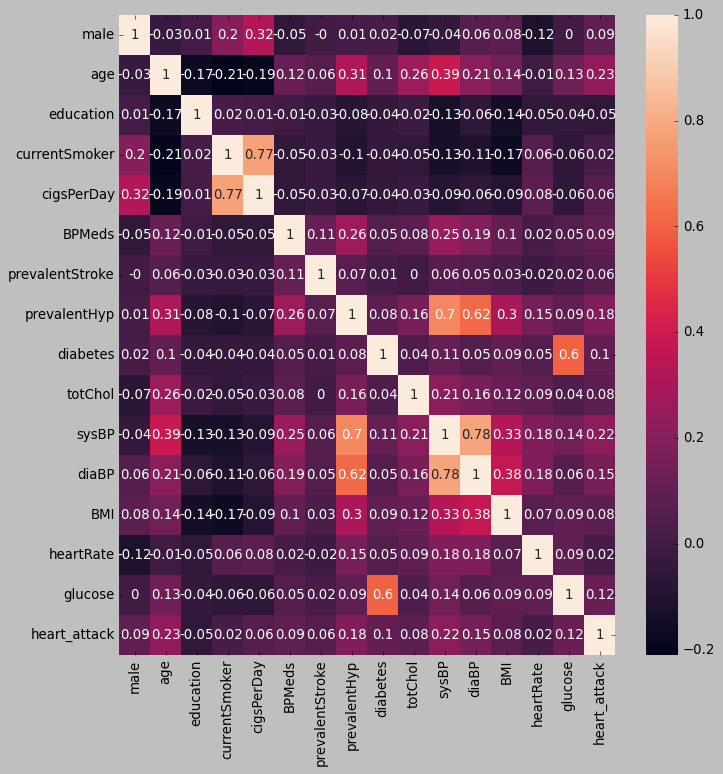

In [742]:
plt.figure(figsize=(10,10))
sns.heatmap(round(df_knn.corr(),2),annot=True)
plt.show()

In [743]:
df_knn.drop(['diaBP','prevalentHyp','currentSmoker'],axis=1,inplace=True)

In [744]:
df_knn2 = df_knn[[ 'age', 'cigsPerDay', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']].apply(lambda x : (x-x.min()) / (x.max()-x.min()))

In [745]:
df_knn2['male'] =df_knn['male']
df_knn2['BPMeds'] =df_knn['BPMeds']
df_knn2['education'] =df_knn['education']
df_knn2['heart_attack'] =df_knn['heart_attack']
df_knn2['prevalentStroke'] =df_knn['prevalentStroke']
df_knn2['diabetes'] = df_knn['diabetes']

In [746]:
df_knn2

,age,cigsPerDay,totChol,sysBP,BMI,heartRate,glucose,male,BPMeds,education,heart_attack,prevalentStroke,diabetes
0,0.184211,0.000000,0.149406,0.106383,0.277024,0.363636,0.104520,1.0,0.0,4.0,0.0,0.0,0.0
1,0.368421,0.000000,0.242784,0.177305,0.319680,0.515152,0.101695,0.0,0.0,2.0,0.0,0.0,0.0
2,0.421053,0.285714,0.234295,0.208038,0.237518,0.313131,0.084746,1.0,0.0,1.0,0.0,0.0,0.0
3,0.763158,0.428571,0.200340,0.314421,0.316045,0.212121,0.177966,0.0,0.0,3.0,1.0,0.0,0.0
4,0.368421,0.328571,0.302207,0.219858,0.183228,0.414141,0.127119,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0.421053,0.285714,0.239389,0.224586,0.156568,0.404040,0.129944,0.0,0.0,2.0,0.0,0.0,0.0
4236,0.315789,0.214286,0.174873,0.203310,0.087736,0.424242,0.103955,0.0,0.0,1.0,0.0,0.0,0.0
4237,0.526316,0.000000,0.275042,0.236407,0.143723,0.363636,0.189266,0.0,0.0,2.0,0.0,0.0,0.0
4238,0.210526,0.000000,0.132428,0.271868,0.243820,0.232323,0.090395,1.0,0.0,3.0,0.0,0.0,0.0


In [747]:
X = df_knn2.drop('heart_attack',axis=1)
y = df_knn2['heart_attack']

#Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [748]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [749]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [750]:
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [751]:
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [752]:
NB_model.fit(X_train,y_train)

GaussianNB()

In [753]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [754]:
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model]

# defining empty list to add train and test data results

acc_train=[]
acc_test=[]
recall_train=[]
recall_test=[]
precision_train=[]
precision_test=[]

# looping through all the models to get tge acuracy, recall and precision scores

for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    
comparison_frame = pd.DataFrame({'Model' : ['DT_model_Knn', 'ADB_model_knn', 'GB_model_knn', 'KNN_model_knn', 'NB_model_knn', 'RF_model_knn'],
                                'Train_accuracy ' : acc_train,'Test_accuracy': acc_test,
                                'Train_Recall' : recall_train,'Test_Recall' :recall_test,
                                'Train_Precision' : precision_train,'Test_Precision':precision_test})
comparison_frame    

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model_Knn,1.00,0.76,1.00,0.25,1.00,0.22
1,ADB_model_knn,0.86,0.85,0.14,0.07,0.70,0.36
2,GB_model_knn,0.88,0.85,0.23,0.09,0.95,0.44
3,KNN_model_knn,0.87,0.83,0.22,0.04,0.74,0.18
4,NB_model_knn,0.83,0.83,0.16,0.18,0.37,0.37
5,RF_model_knn,1.00,0.85,1.00,0.06,1.00,0.52


In [755]:
sm = SMOTE(random_state=2)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train)

In [761]:
models = [DT_model, ADB_model, GB_model, KNN_model, NB_model, RF_model,ADB_model_s,GB_model_s,RF_model_s]

# defining empty list to add train and test data results

acc_train=[]
acc_test=[]
recall_train=[]
recall_test=[]
precision_train=[]
precision_test=[]

# looping through all the models to get tge acuracy, recall and precision scores

for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    
comparison_frame = pd.DataFrame({'Model' : ['DT_model_Knn', 'ADB_model_knn', 'GB_model_knn',
                                            'KNN_model_knn', 'NB_model_knn', 'RF_model_knn',
                                            'ADB_model_s_knn', 'GB_model_s_knn','RF_model_s'],
                                'Train_accuracy ' : acc_train,'Test_accuracy': acc_test,
                                'Train_Recall' : recall_train,'Test_Recall' :recall_test,
                                'Train_Precision' : precision_train,'Test_Precision':precision_test})
comparison_frame    

,Model,Train_accuracy,Test_accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,DT_model_Knn,1.00,0.76,1.00,0.25,1.00,0.22
1,ADB_model_knn,0.86,0.85,0.14,0.07,0.70,0.36
2,GB_model_knn,0.88,0.85,0.23,0.09,0.95,0.44
3,KNN_model_knn,0.87,0.83,0.22,0.04,0.74,0.18
4,NB_model_knn,0.83,0.83,0.16,0.18,0.37,0.37
5,RF_model_knn,1.00,0.85,1.00,0.06,1.00,0.52
6,ADB_model_s_knn,0.71,0.68,0.56,0.52,0.28,0.24
7,GB_model_s_knn,0.79,0.72,0.61,0.40,0.38,0.24
8,RF_model_s,1.00,0.78,1.00,0.24,1.00,0.24


In [756]:
ADB_model_s = AdaBoostClassifier()

In [757]:
ADB_model_s.fit(X_train_s,y_train_s)

AdaBoostClassifier()

In [758]:
GB_model_s = GradientBoostingClassifier()

In [759]:
GB_model_s.fit(X_train_s,y_train_s)

GradientBoostingClassifier()

In [760]:
RF_model_s = RandomForestClassifier(n_estimators=100,random_state=1)
RF_model_s.fit(X_train_s,y_train_s)

RandomForestClassifier(random_state=1)

In [763]:
df_knn2 = df_knn2.to_csv('df_knn.csv')

In [764]:
comparison_frame=comparison_frame.to_csv('Model_Comparision.csv')